## EDA

In [0]:
import pandas as pd
import numpy as np

In [0]:
df_tr = pd.read_csv('Regular_Season_Batter.csv')
pd.set_option('display.max_columns', 500)
df.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


<pre>
  *avg : 타율
  *G : 출전 게임수
  *AB : 타수(타자가 타석에 얼마나 섰는지)
  *R : 득점
  *H : 총안타
  *2B : 2루타 수
  *3B : 3루타 수
  *HR : 홈런 수
  *TB : 루타 수
  *RBI : 타점 수
  *SB : 도루 성공 횟수
  *CS : 도루 실패 횟수
  *BB : 볼넷 수
  *HBP : 사구
  *SO : 삼진 아웃
  *GDP : 병살타 수
  *SLG : 장타율
  *OBP : 출루율
  *E : 에러 수(수비 실책)
  *position : 수비위치
  *OPS : target
</pre>

In [0]:
df_te = pd.read_csv('submission.csv')
df_te.head()

,batter_id,batter_name,batter_ops
0,1,강경학,0
1,2,강구성,0
2,3,강민국,0
3,4,강민호,0
4,5,강백호,0


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


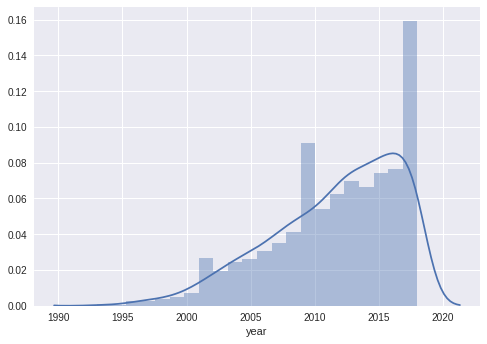

In [0]:
sns.distplot(df_tr['year'])

In [0]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
batter_id          2454 non-null int64
batter_name        2454 non-null object
year               2454 non-null int64
team               2454 non-null object
avg                2428 non-null float64
G                  2454 non-null int64
AB                 2454 non-null int64
R                  2454 non-null int64
H                  2454 non-null int64
2B                 2454 non-null int64
3B                 2454 non-null int64
HR                 2454 non-null int64
TB                 2454 non-null int64
RBI                2454 non-null int64
SB                 2454 non-null int64
CS                 2454 non-null int64
BB                 2454 non-null int64
HBP                2454 non-null int64
SO                 2454 non-null int64
GDP                2454 non-null int64
SLG                2428 non-null float64
OBP                2430 non-null float64
E                  2454 non

In [0]:
import missingno as msn

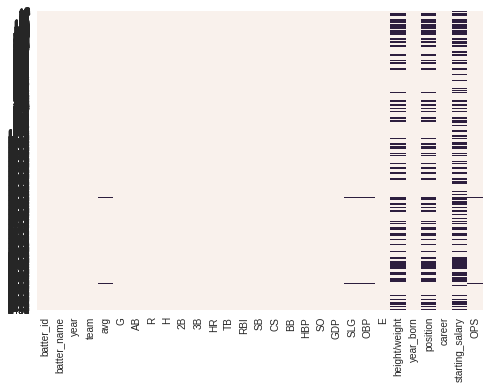

In [0]:
sns.heatmap(df_tr.isnull(), cbar=False)

In [0]:
df_tr.loc[1]

batter_id                          1
batter_name                      강경학
year                            2011
team                              한화
avg                                0
G                                  2
AB                                 1
R                                  0
H                                  0
2B                                 0
3B                                 0
HR                                 0
TB                                 0
RBI                                0
SB                                 0
CS                                 0
BB                                 0
HBP                                0
SO                                 1
GDP                                0
SLG                                0
OBP                                0
E                                  1
height/weight             180cm/72kg
year_born              1992년 08월 11일
position                   내야수(우투좌타)
career             광주대성초-광주동성중-광주동성고
s

In [0]:
pd.groupby(df_tr[''])

## 목차

1. 데이터 나누기
2. 선수별 OPS 예측 모델 만들기
3. 승리 팀 예측 모델 만들기

### 1. 데이터 나누기

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import rc, font_manager
rc('font', family='NanumSquareR')
import os

In [0]:
df = pd.read_csv('Regular_Season_Batter.csv')

In [4]:
df.loc[df['OPS']>0.9]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519000,0.383000,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902000
53,4,강민호,2015,롯데,0.311,123,380,63,118,18,...,14,0.639000,0.421000,8,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,1.060000
54,4,강민호,2016,롯데,0.323,116,381,65,123,26,...,7,0.549000,0.433000,4,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,0.982000
78,7,강봉규,2009,삼성,0.310,126,449,89,139,24,...,15,0.505568,0.406130,4,NaN,1978년 01월 12일,NaN,부천초-개성중-경남고-고려대-두산-삼성,NaN,0.911698
95,10,강정호,2012,넥센,0.314,124,436,77,137,32,...,16,0.559633,0.417154,12,NaN,1987년 04월 05일,NaN,화정초-무등중-광주제일고-(남부대)-현대-우리-히어로즈-넥센,NaN,0.976787
97,10,강정호,2014,넥센,0.356,117,418,103,149,36,...,8,0.739234,0.460922,9,NaN,1987년 04월 05일,NaN,화정초-무등중-광주제일고-(남부대)-현대-우리-히어로즈-넥센,NaN,1.200156
98,11,강진성,2013,NC,0.500,3,2,1,1,1,...,0,1.000000,0.667000,0,180cm/81kg,1993년 10월 19일,내야수(우투우타),가동초-잠신중-경기고-NC-경찰,7000만원,1.667000
99,11,강진성,2017,NC,0.296,28,27,5,8,3,...,1,0.519000,0.406000,0,180cm/81kg,1993년 10월 19일,내야수(우투우타),가동초-잠신중-경기고-NC-경찰,7000만원,0.925000
130,17,고영민,2013,두산,0.286,10,14,3,4,1,...,1,0.571429,0.411765,0,NaN,1984년 02월 08일,NaN,도신초-영남중-성남고-두산,NaN,0.983193
135,230,이종환,2012,KIA,0.385,6,13,2,5,2,...,0,0.769231,0.384615,0,NaN,1986년 05월 08일,NaN,태안초-태안중-북일고-단국대-KIA-상무-KIA,NaN,1.153846


In [5]:
df.loc[df['batter_name']=='박석민']

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
797,115,박석민,2004,삼성,0.103,23,29,2,3,1,...,3,0.241,0.188,1,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.429
798,115,박석민,2005,삼성,0.198,52,81,7,16,3,...,3,0.259,0.283,3,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.542
799,115,박석민,2008,삼성,0.279,126,416,65,116,27,...,15,0.450,0.385,18,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.835
800,115,박석민,2009,삼성,0.285,97,295,63,84,17,...,5,0.586,0.416,6,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,1.002
801,115,박석민,2010,삼성,0.303,112,356,58,108,18,...,14,0.480,0.440,7,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.920
802,115,박석민,2011,삼성,0.278,128,457,74,127,24,...,13,0.442,0.374,13,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.816
803,115,박석민,2012,삼성,0.312,127,443,79,138,19,...,8,0.524,0.433,12,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.957
804,115,박석민,2013,삼성,0.318,117,396,61,126,24,...,13,0.515,0.425,10,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.940
805,115,박석민,2014,삼성,0.315,110,356,77,112,21,...,12,0.601,0.419,12,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,1.020
806,115,박석민,2015,삼성,0.321,135,448,90,144,25,...,13,0.551,0.441,14,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.992


In [6]:
df.loc[df['year']==2018]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
6,1,강경학,2018,한화,0.278,77,245,42,68,11,...,7,0.392,0.382,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.774
11,2,강구성,2018,NC,0.200,4,5,0,1,1,...,0,0.400,0.200,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.600
41,3,강민국,2018,NC,0.250,6,4,0,1,0,...,0,0.250,0.250,0,176cm/80kg,1992년 01월 10일,내야수(우투우타),송정동초-충장중-광주제일고-동국대-NC-상무,20000만원,0.500
56,4,강민호,2018,삼성,0.269,129,427,46,115,14,...,11,0.457,0.331,8,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,0.788
57,5,강백호,2018,KT,0.290,138,527,108,153,32,...,4,0.524,0.356,6,184cm/98kg,1999년 07월 29일,외야수(우투좌타),부천북초-이수중-서울고,45000만원,0.880
85,8,강상원,2018,한화,0.000,6,6,0,0,0,...,0,0.000,0.143,0,172cm/64kg,1997년 05월 05일,외야수(우투좌타),온양온천초-온양중-북일고,3000만원,0.143
88,9,강승호,2018,SK,0.255,69,184,14,47,10,...,2,0.359,0.330,11,179cm/77kg,1994년 02월 09일,내야수(우투우타),순천북초-천안북중-북일고-LG-경찰-LG,20000만원,0.689
100,11,강진성,2018,NC,0.235,45,68,5,16,3,...,3,0.279,0.274,0,180cm/81kg,1993년 10월 19일,내야수(우투우타),가동초-잠신중-경기고-NC-경찰,7000만원,0.553
105,12,강한울,2018,삼성,0.259,83,193,20,50,5,...,1,0.306,0.306,4,181cm/66kg,1991년 09월 12일,내야수(우투좌타),사당초-중앙중-안산공고-원광대-KIA,14000만원,0.612


In [7]:
len(df.loc[df['year']==2018])

227

In [8]:
len(df.loc[df['year']==2017])

217

In [9]:
len(df.loc[df['year']==2016])

213

In [10]:
len(df.loc[df['year']==2015])

207

In [11]:
len(df.loc[df['year']==2014])

186

In [12]:
len(df.loc[df['year']==2013])

194

In [13]:
len(df.loc[df['year']==2012])

174

In [14]:
len(df.loc[df['year']==2011])

151

In [15]:
len(df)

2454

TypeError: ignored

In [0]:
batter_park = df.loc[df['batter_name']=='박석민']

In [18]:
batter_park['OPS']

797    0.429
798    0.542
799    0.835
800    1.002
801    0.920
802    0.816
803    0.957
804    0.940
805    1.020
806    0.992
807    0.982
808    0.792
809    0.816
Name: OPS, dtype: float64

In [19]:
batter_park

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
797,115,박석민,2004,삼성,0.103,23,29,2,3,1,...,3,0.241,0.188,1,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.429
798,115,박석민,2005,삼성,0.198,52,81,7,16,3,...,3,0.259,0.283,3,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.542
799,115,박석민,2008,삼성,0.279,126,416,65,116,27,...,15,0.450,0.385,18,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.835
800,115,박석민,2009,삼성,0.285,97,295,63,84,17,...,5,0.586,0.416,6,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,1.002
801,115,박석민,2010,삼성,0.303,112,356,58,108,18,...,14,0.480,0.440,7,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.920
802,115,박석민,2011,삼성,0.278,128,457,74,127,24,...,13,0.442,0.374,13,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.816
803,115,박석민,2012,삼성,0.312,127,443,79,138,19,...,8,0.524,0.433,12,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.957
804,115,박석민,2013,삼성,0.318,117,396,61,126,24,...,13,0.515,0.425,10,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.940
805,115,박석민,2014,삼성,0.315,110,356,77,112,21,...,12,0.601,0.419,12,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,1.020
806,115,박석민,2015,삼성,0.321,135,448,90,144,25,...,13,0.551,0.441,14,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.992


In [20]:
batter_park[['year', 'OPS']]

,year,OPS
797,2004,0.429
798,2005,0.542
799,2008,0.835
800,2009,1.002
801,2010,0.920
802,2011,0.816
803,2012,0.957
804,2013,0.940
805,2014,1.020
806,2015,0.992


In [21]:
batter_park['OPS'].mean()

0.8494615384615384

In [23]:
df.loc[(df['batter_name']=='박석민')&(df['year']==2009)]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
800,115,박석민,2009,삼성,0.285,97,295,63,84,17,...,5,0.586,0.416,6,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,1.002


In [0]:
batters = '박석민', '채태인', '최형우', '박해민'

In [26]:
for i in batters:
  print(df.loc[df['batter_name']==i]['OPS'].mean())

0.8494615384615384
0.7950833333333335
0.9003076923076923
0.7525999999999999


In [32]:
for i in range(0,3):
  print(df['OPS'].iloc[i])

0.902
0.0
0.6859999999999999


In [31]:
range(1,3)

range(1, 3)

In [35]:
len(df)

2454

In [0]:
for i in range(len(df)):
  print(df['OPS'].iloc[i])

In [36]:
for i in range(3):
  print(df['OPS'].iloc[i]-df['avg'].iloc[i])

0.5630000000000001
0.0
0.46499999999999997


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib.inline
from matplotlib import rc, font_manager
rc('font', family='NanumSquareR')
import os

UsageError: Line magic function `%matplotlib.inline` not found.


In [0]:
df = pd.read_csv('Regular_Season_Batter.csv')

In [39]:
df.iloc[4]

batter_id                          1
batter_name                      강경학
year                            2016
team                              한화
avg                            0.158
G                                 46
AB                               101
R                                 16
H                                 16
2B                                 3
3B                                 2
HR                                 1
TB                                26
RBI                                7
SB                                 0
CS                                 0
BB                                 8
HBP                                2
SO                                30
GDP                                5
SLG                            0.257
OBP                            0.232
E                                  7
height/weight             180cm/72kg
year_born              1992년 08월 11일
position                   내야수(우투좌타)
career             광주대성초-광주동성중-광주동성고
s

In [40]:
df.loc[(df['batter_name']=='강경학')]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489
5,1,강경학,2017,한화,0.214,59,84,17,18,2,...,1,0.262,0.290,4,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.552
6,1,강경학,2018,한화,0.278,77,245,42,68,11,...,7,0.392,0.382,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.774


In [41]:
df.loc[(df['batter_name']=='강경학')&(df['year']==2016-1)]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673


In [42]:
len(df.loc[(df['batter_name']=='강경학')])

6

In [43]:
df.loc[(df['batter_name']=='강경학')&(df['year']==2016-1)]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673


In [44]:
df.loc[(df['batter_name']=='강경학')&(df['year']==2016-1)]['OPS']

3    0.673
Name: OPS, dtype: float64

In [45]:
df.loc[(df['batter_name']==df['batter_name'].iloc[4])]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489
5,1,강경학,2017,한화,0.214,59,84,17,18,2,...,1,0.262,0.290,4,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.552
6,1,강경학,2018,한화,0.278,77,245,42,68,11,...,7,0.392,0.382,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.774


In [46]:
df.loc[(df['batter_name']==df['batter_name'].iloc[4])&(df['year']==df['year'].iloc[4]-1)]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673


In [48]:
df.loc[(df['batter_name']==df['batter_name'].iloc[4])&(df['year']==df['year'].iloc[4]-1)]['OPS'].iloc[0]

0.6729999999999999

In [51]:
df['batter_name']==df['batter_name'].iloc[0]

0        True
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2424    False
2425    False
2426    False
2427    False
2428    False
2429    False
2430    False
2431    False
2432    False
2433    False
2434    False
2435    False
2436    False
2437    False
2438    False
2439    False
2440    False
2441    False
2442    False
2443    False
2444    False
2445    False
2446    False
2447    False
2448    False
2449    False
2450    False
2451    False
2452    False
2453    False
Name: batter_name, Length: 2454, dtype: bool

In [53]:
df['year'].iloc[1]

2011

In [54]:
df['year'].iloc[0]

2018

In [52]:
df['year']==df['year'].iloc[2]-1

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7        True
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18       True
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2424    False
2425    False
2426    False
2427    False
2428    False
2429    False
2430    False
2431    False
2432    False
2433    False
2434    False
2435    False
2436    False
2437    False
2438    False
2439    False
2440     True
2441    False
2442    False
2443    False
2444    False
2445    False
2446     True
2447    False
2448     True
2449    False
2450    False
2451    False
2452    False
2453    False
Name: year, Length: 2454, dtype: bool

In [0]:
for i in range(len(df)):
  if len(df.loc[(df['batter_name']==df['batter_name'].iloc[i])&df['year']==df['year'].iloc[i]-1]['OPS'])==0:
    print(np.nan)
  else:
    print(df.loc[(df['batter_name']==df['batter_name'].iloc[i])&])

In [55]:
print(df['year'].iloc[0])
print(df['year'].iloc[1])
print(df['year'].iloc[2])
print(df['year'].loc[3])
print(df['year'].loc[4])
print(df['year'].iloc[5])
print(df['year'].iloc[6])

2018
2011
2014
2015
2016
2017
2018


In [58]:
for i in range(20):
  print(df['year'].iloc[i])

2018
2011
2014
2015
2016
2017
2018
2013
2015
2016
2017
2018
2005
2006
2007
2008
2011
2012
2013
1997


In [60]:
for i in range(30):
  print(df['batter_name'].iloc[i])

가르시아
강경학
강경학
강경학
강경학
강경학
강경학
강구성
강구성
강구성
강구성
강구성
백승룡
백승룡
백승룡
백승룡
백승룡
백승룡
백승룡
진갑용
진갑용
진갑용
진갑용
진갑용
진갑용
진갑용
진갑용
진갑용
진갑용
진갑용


In [71]:
df.loc[df['year']==2018]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
6,1,강경학,2018,한화,0.278,77,245,42,68,11,1,5,96,27,6,3,38,4,59,7,0.392,0.382,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.774
11,2,강구성,2018,NC,0.200,4,5,0,1,1,0,0,2,1,0,0,0,0,3,0,0.400,0.200,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.600
41,3,강민국,2018,NC,0.250,6,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0.250,0.250,0,176cm/80kg,1992년 01월 10일,내야수(우투우타),송정동초-충장중-광주제일고-동국대-NC-상무,20000만원,0.500
56,4,강민호,2018,삼성,0.269,129,427,46,115,14,0,22,195,71,0,0,29,14,96,11,0.457,0.331,8,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,0.788
57,5,강백호,2018,KT,0.290,138,527,108,153,32,2,29,276,84,3,5,52,3,124,4,0.524,0.356,6,184cm/98kg,1999년 07월 29일,외야수(우투좌타),부천북초-이수중-서울고,45000만원,0.880
85,8,강상원,2018,한화,0.000,6,6,0,0,0,0,0,0,0,1,0,1,0,2,0,0.000,0.143,0,172cm/64kg,1997년 05월 05일,외야수(우투좌타),온양온천초-온양중-북일고,3000만원,0.143
88,9,강승호,2018,SK,0.255,69,184,14,47,10,0,3,66,31,1,1,18,3,57,2,0.359,0.330,11,179cm/77kg,1994년 02월 09일,내야수(우투우타),순천북초-천안북중-북일고-LG-경찰-LG,20000만원,0.689
100,11,강진성,2018,NC,0.235,45,68,5,16,3,0,0,19,1,0,0,4,0,17,3,0.279,0.274,0,180cm/81kg,1993년 10월 19일,내야수(우투우타),가동초-잠신중-경기고-NC-경찰,7000만원,0.553
105,12,강한울,2018,삼성,0.259,83,193,20,50,5,2,0,59,8,3,4,12,1,34,1,0.306,0.306,4,181cm/66kg,1991년 09월 12일,내야수(우투좌타),사당초-중앙중-안산공고-원광대-KIA,14000만원,0.612


In [70]:
pd.options.display.max_columns

100

In [0]:
pd.set_option('display.max_columns',100)